# Authors:
         Rutvik Pansare       
         Praksha maheshwari
         Vishal Phaugat

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [3]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="rutu12345",
  database="project"
)
query = "SELECT * FROM project.crime_data;"
df = pd.read_sql(query,mydb)

mydb.close() #close the connection

In [4]:
from datetime import datetime
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])
df['YEAR'] = pd. DatetimeIndex(df['CMPLNT_FR_DT']).year

Text(0.5, 0, 'Number of Crimes')

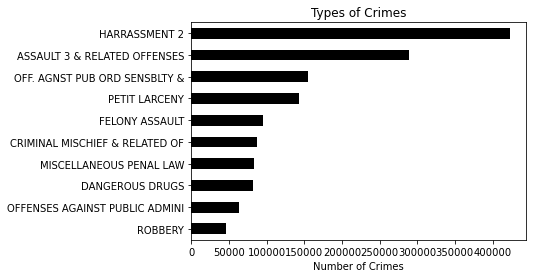

In [5]:
df.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes",color = 'black')
plt.xlabel('Number of Crimes')

<ipython-input-6-c868d424c7ab>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0, 0.5, '')

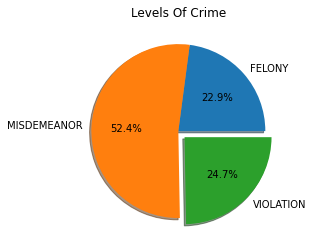

In [6]:
crime = df.groupby('LAW_CAT_CD')['CMPLNT_NUM'].count()
plot = crime.plot.pie(y='hours',title="Levels Of Crime", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)
plt.axes().set_ylabel('')

Text(0.5, 1.0, 'Sex crimes by year')

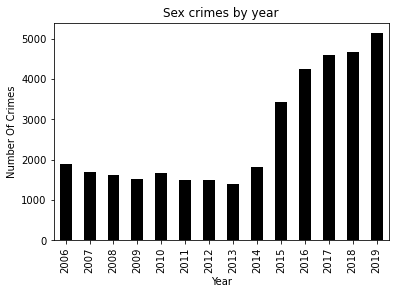

In [7]:
sex_crimes = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]

sex_crimes.groupby("YEAR")['CMPLNT_NUM'].count().plot(kind = "bar",color = 'black')
plt.xlabel('Year')
plt.ylabel("Number Of Crimes")
plt.title("Sex crimes by year")

4


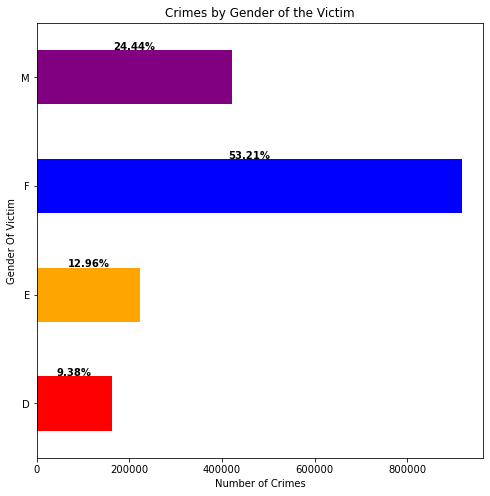

In [11]:
percentage = []
victim = df.groupby("VIC_SEX")['CMPLNT_NUM'].count()
victim = victim[0:4]
print(len(victim))
for i in victim:
    pct = (i / victim.sum()) * 100
    percentage.append(round(pct,2))

# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
result = victim.plot(kind = 'barh',color = colors_list)
plt.title('Crimes by Gender of the Victim')
plt.xlabel('Number of Crimes')
plt.ylabel("Gender Of Victim")
i = 0
for p in result.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1

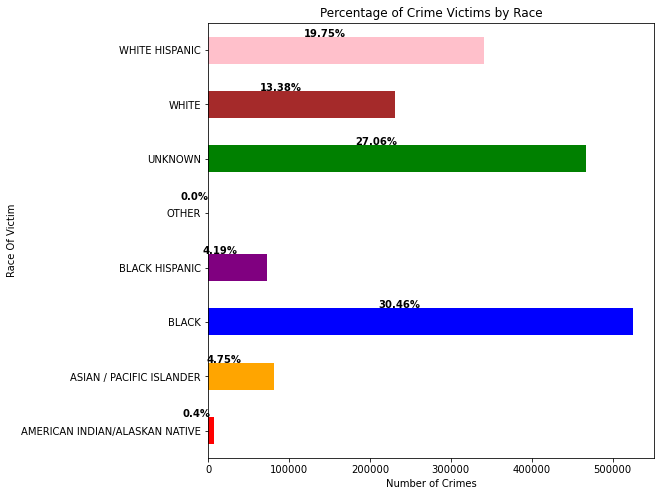

In [12]:
percentage = []
victim = df.groupby("VIC_RACE")['CMPLNT_NUM'].count()
for i in victim:
    pct = (i / victim.sum()) * 100
    percentage.append(round(pct,2))
 
# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple','yellow','green','brown','pink']
plt.title('Percentage of Crime Victims by Race')
result = victim.plot(kind = 'barh',color = colors_list)
plt.xlabel('Number of Crimes')
plt.ylabel("Race Of Victim")
i = 0
for p in result.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='right',
             weight='bold')
    i+=1
plt.show()

In [11]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,100000228,2012-02-08,0 days 18:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,995500.0,149215.0,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,"(40.576237762, -73.959504022)",45-64,WHITE,F,2012
1,100000272,2016-01-31,0 days 00:40:00,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,BRONX,BAR/NIGHT CLUB,N.Y. POLICE DEPT,1011263.0,251973.0,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,"(40.858249408, -73.902348526)",UNKNOWN,UNKNOWN,E,2016
2,100000480,2010-01-26,0 days 17:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BRONX,STREET,N.Y. POLICE DEPT,1017934.0,232221.0,18-24,WHITE,M,40.804012949000004,-73.878331833,"(40.804012949, -73.878331833)",18-24,WHITE HISPANIC,M,2010
3,100000495,2017-11-24,0 days 20:10:00,DANGEROUS DRUGS,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,N.Y. POLICE DEPT,993511.0,185309.0,45-64,BLACK,M,40.675310519,-73.96661445,"(40.675310519, -73.96661445)",UNKNOWN,UNKNOWN,E,2017
4,100000926,2015-07-12,0 days 14:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,DRY CLEANER/LAUNDRY,N.Y. POLICE DEPT,997321.0,177773.0,25-44,BLACK,F,40.654621066,-73.952893562,"(40.654621066, -73.952893562)",25-44,ASIAN / PACIFIC ISLANDER,M,2015


7


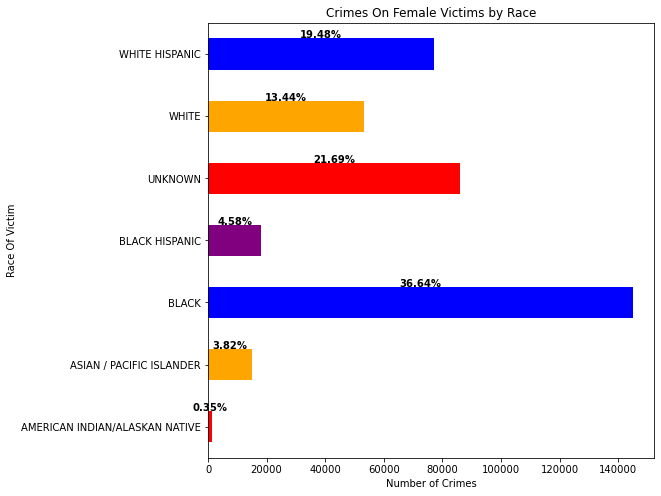

In [13]:
data = df[df.SUSP_SEX == 'F']
percentage = []
victim = data.groupby("VIC_RACE")['CMPLNT_NUM'].count()
print(len(victim))
for i in victim:
    pct = (i / victim.sum()) * 100
    percentage.append(round(pct,2))

# depict illustration
plt.figure(figsize=(8,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
result = victim.plot(kind = 'barh',color = colors_list)
plt.title('Crimes On Female Victims by Race')
plt.xlabel('Number of Crimes')
plt.ylabel("Race Of Victim")
i = 0
for p in result.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

In [3]:
year_query.drop(['CMPLNT_NUM', 'JURIS_DESC','X_COORD_CD','Y_COORD_CD','Lat_Lon'], axis=1, inplace=True)

NameError: name 'year_query' is not defined